![Global Internet Banner](banner_image.png)

# Internet: A Global Phenomenon

This dataset contains information on internet access around the world.

The workspace is set up with two CSV files containing information on global internet access for years ranging from 1990 to 2020.

- `internet_users.csv`
    - `users` - The number of people who have used the internet in the last three months
    - `share` - The share of the entity's population who have used the internet in the last three months
- `adoption.csv`
    - `fixed_telephone_subs` - The number of people who have a telephone landline connection
    - `fixed_telephone_subs_share` - The share of the entity's population who have a telephone landline connection
    - `fixed_broadband_subs` - The number of people who have a broadband internet landline connection
    - `fixed_broadband_subs_share` - The share of the entity's population who have a broadband internet landline connection
    - `mobile_cell_subs` - The number of people who have a mobile subscription
    - `mobile_cell_subs_share` - The share of the entity's population who have a mobile subscription

Both data files are indexed on the following 3 attributes:

- `entity` - The name of the country, region, or group.
- `code` - Unique id for the country (null for other entities).
- `year` - Year from 1990 to 2020.

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Our World In Data](https://ourworldindata.org/internet)

### 🌎 **Some guiding questions to help you explore this data:**

1. What are the top 5 countries with the highest internet use (by population share)?
2. What are the top 5 countries with the highest internet use for some large regions?
3. What is the correlation between internet usage (population share) and broadband subscriptions for 2020?

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

### 📊 **Visualization ideas**
- Line chart: Display internet usage over time of the top 5 countries.
- Map: Vividly illustrate the internet usage around the world in a certain year on a map. Leveraging, for example, [GeoPandas](https://geopandas.org/en/stable/index.html) or [Folium](https://python-visualization.github.io/folium/latest/).

### 🔍 **Scenario: Identify emerging markets for a global internet provider**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a global internet provider on a mission to provide affordable Internet access to everybody around the world using satellites. You are tasked with identifying which markets (regions or countries) are most worthwhile to focus efforts on.

**Objective**: Construct a top 5 list of countries where there is a big opportunity to roll out our services. Try to consider the amount of people not having access to (good) wired or mobile internet and their spending power.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [2]:
SELECT *
FROM 'internet_users.csv'
LIMIT 10

,entity,code,year,users,share
0,Afghanistan,AFG,1991,0,0.000000
1,Afghanistan,AFG,1992,0,0.000000
2,Afghanistan,AFG,1993,0,0.000000
3,Afghanistan,AFG,1994,0,0.000000
4,Afghanistan,AFG,2001,930,0.004723
5,Afghanistan,AFG,2003,19903,0.087891
6,Afghanistan,AFG,2004,24922,0.105809
7,Afghanistan,AFG,2005,298829,1.224148
8,Afghanistan,AFG,2006,536114,2.107124
9,Afghanistan,AFG,2007,492163,1.900000


In [3]:
import pandas as pd

internet_users = pd.read_csv('internet_users.csv')
internet_users.head()

,entity,code,year,users,share
0,Afghanistan,AFG,1991,0,0.000000
1,Afghanistan,AFG,1992,0,0.000000
2,Afghanistan,AFG,1993,0,0.000000
3,Afghanistan,AFG,1994,0,0.000000
4,Afghanistan,AFG,2001,930,0.004723


In [4]:
adoption = pd.read_csv('adoption.csv')
adoption.head()

,entity,code,year,fixed_telephone_subs,fixed_telephone_subs_share,fixed_broadband_subs,fixed_broadband_subs_share,mobile_cell_subs,mobile_cell_subs_share
0,Afghanistan,AFG,1960,7700.0,0.089302,NaN,NaN,0.0,0.0
1,Afghanistan,AFG,1961,7700.0,0.085584,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,7700.0,0.085584,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,7700.0,0.085584,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,7700.0,0.085584,NaN,NaN,NaN,NaN


## Ready to share your work?

Click "Share" in the upper right corner, copy the link, and share it! You can also add this workspace to your DataCamp Portfolio

# Top 5 countries with the highest internet use by population 

In [5]:
# Filter the data for the year 2020
internet_users_2020 = internet_users[internet_users['year'] == 2020]

# Sort the data based on the share column in descending order and get the top 5 countries
top5_countries_2020 = internet_users_2020.sort_values(by='share', ascending=False).head(5)

top5_countries_2020[['entity', 'share']]

,entity,share
5608,United Arab Emirates,100.00000
346,Bahrain,99.67105
4600,Qatar,99.65285
2900,Kuwait,99.10588
2550,Iceland,99.00000


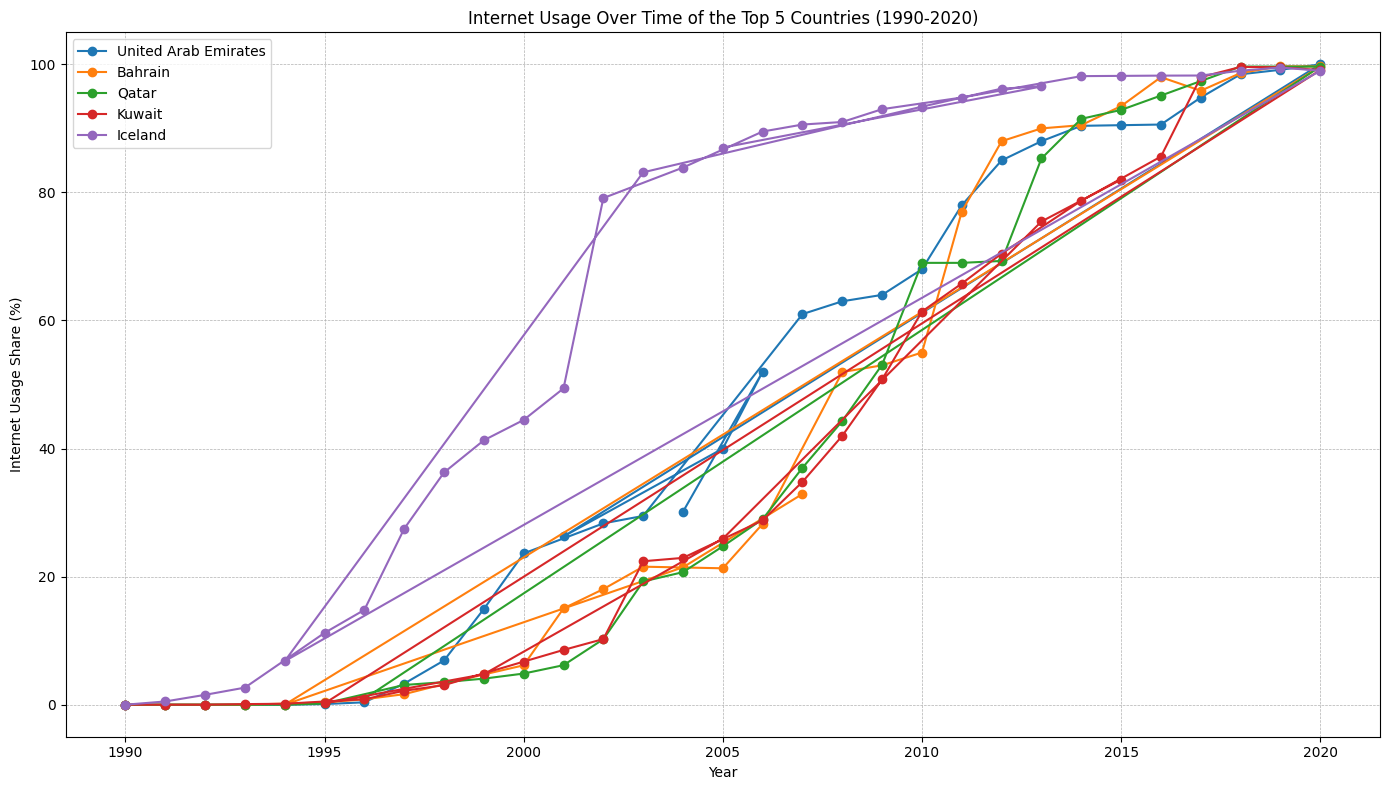

In [21]:
import matplotlib.pyplot as plt

# List of top 5 countries for 2020
top5_countries_list = top5_countries_2020['entity'].tolist()

# Filter the internet_users data for these countries
top5_countries_data = internet_users[internet_users['entity'].isin(top5_countries_list)]

# Plotting the line chart
plt.figure(figsize=(14, 8))

for country in top5_countries_list:
    country_data = top5_countries_data[top5_countries_data['entity'] == country]
    plt.plot(country_data['year'], country_data['share'], label=country, marker='o')

plt.title('Internet Usage Over Time of the Top 5 Countries (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Internet Usage Share (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

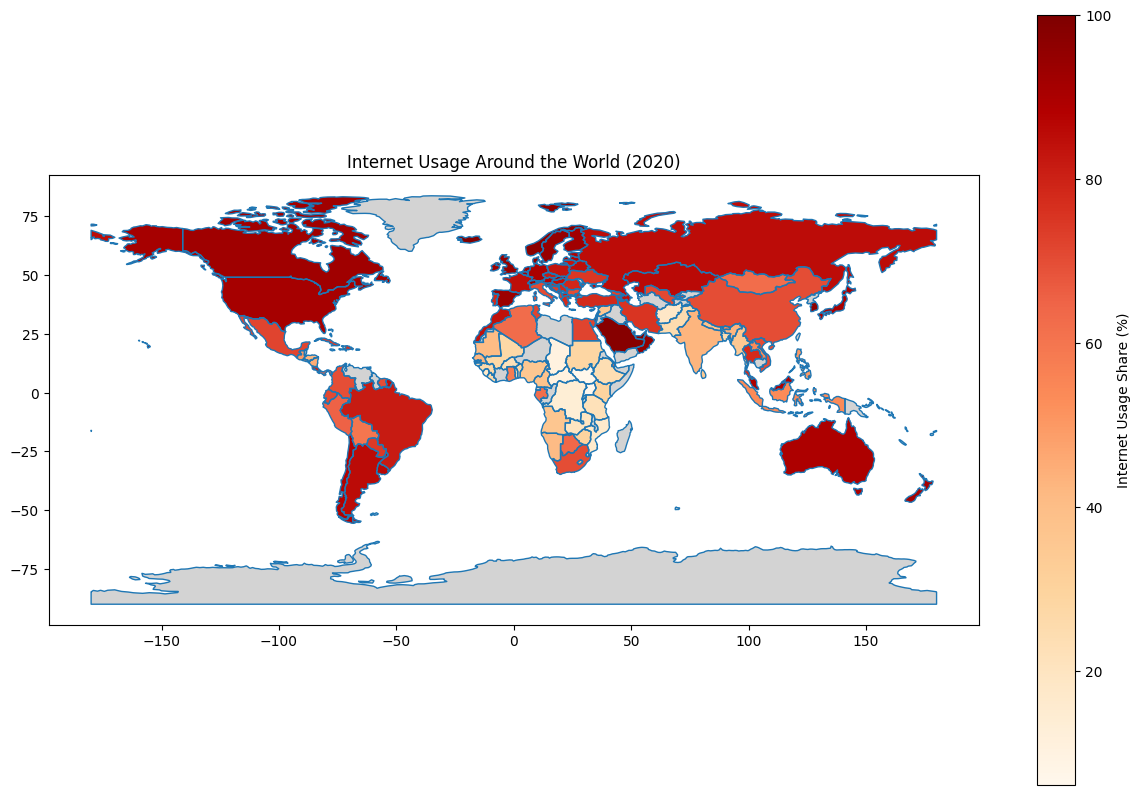

In [20]:
import geopandas as gpd

# Load the world map data from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the internet usage data for 2020
world_internet_2020 = world.merge(internet_users_2020, left_on='iso_a3', right_on='code', how='left')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world_internet_2020.plot(column='share', ax=ax, legend=True,
                         legend_kwds={'label': "Internet Usage Share (%)"},
                         cmap='OrRd', missing_kwds={'color': 'lightgrey'})

ax.set_title('Internet Usage Around the World (2020)')
plt.show()

# Top 5 countries with the highest internet use for some large regions

**We can focus on specific large regions such as Asia, Africa, Europe, North America, and South America. We will extract the top country with the highest internet use from each of these regions for the year 2020. If regional information isn't explicitly available in the dataset, we can use an external source to identify countries belonging to these regions.**

In [6]:
# Check unique entities in the dataset to identify potential regional aggregates
unique_entities = internet_users_2020['entity'].unique()

# Display the unique entities
unique_entities[:50]  # Displaying the first 50 to see if there are any regional aggregates

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Finland', 'Benin', 'Brunei', 'Burkina Faso',
       'El Salvador', 'Costa Rica', 'Africa', 'Asia'], dtype=object)

It appears that the dataset contains regional aggregates such as "Africa" and "Asia." Given this, we can extract the top countries with the highest internet use for 2020 from the following regions: Asia, Africa, Europe, North America, and South America.

### Top country with the highest internet use from each of these regions for the year 2020

In [7]:
# List of regions of interest
regions_of_interest = ["Asia", "Africa", "Europe", "North America", "South America"]

# Identify the top country with the highest internet use from each region for 2020
top_countries_by_region = {}
for region in regions_of_interest:
    region_data = internet_users_2020[internet_users_2020['entity'] == region]
    if not region_data.empty:
        top_country = region_data.sort_values(by='share', ascending=False).iloc[0]
        top_countries_by_region[region] = (top_country['entity'], top_country['share'])

top_countries_by_region

{'Asia': ('Asia', nan),
 'Africa': ('Africa', nan),
 'Europe': ('Europe', nan),
 'North America': ('North America', nan),
 'South America': ('South America', nan)}

It seems that while the dataset contains regional aggregates, the values for internet usage by population share for these regions in 2020 are missing (NaN).

**Given this constraint, we can proceed to identify the top country with the highest internet use for 2020 from a sample list of countries representing each region. Let's go ahead with that approach.**

In [8]:
# Sample list of countries representing each region
countries_by_region = {
    "Asia": ["China", "India", "Japan", "South Korea", "Indonesia"],
    "Africa": ["Nigeria", "South Africa", "Egypt", "Kenya", "Morocco"],
    "Europe": ["Germany", "United Kingdom", "France", "Italy", "Spain"],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Chile", "Colombia", "Peru"]
}

# Identify the top country with the highest internet use from each region for 2020
top_countries_by_sample = {}
for region, countries in countries_by_region.items():
    region_data = internet_users_2020[internet_users_2020['entity'].isin(countries)]
    if not region_data.empty:
        top_country = region_data.sort_values(by='share', ascending=False).iloc[0]
        top_countries_by_sample[region] = (top_country['entity'], top_country['share'])

top_countries_by_sample

{'Asia': ('South Korea', 96.50506),
 'Africa': ('Morocco', 84.12036),
 'Europe': ('United Kingdom', 94.8182),
 'North America': ('Canada', 92.3),
 'South America': ('Chile', 88.3)}

Based on our approximation using a sample list of countries representing each region, the top countries with the highest internet use (by population share) in 2020 are:

- Asia: South Korea with 96.51%
- Africa: Morocco with 84.12%
- Europe: United Kingdom with 94.82%
- North America: Canada with 92.3%
- South America: Chile with 88.3%

# What is the correlation between internet usage (population share) and broadband subscriptions for 2020?

We'll merge the internet user's data with the adoption data for the year 2020 and calculate the correlation between internet usage by population share and fixed broadband subscriptions by share.

In [9]:
# Filter the adoption data for the year 2020
adoption_2020 = adoption[adoption['year'] == 2020]

# Merge the internet_users data with the adoption data for 2020
merged_2020 = pd.merge(internet_users_2020, adoption_2020, on=['entity', 'code', 'year'], how='inner')

# Calculate the correlation between 'share' (internet usage) and 'fixed_broadband_subs_share'
correlation = merged_2020[['share', 'fixed_broadband_subs_share']].corr().iloc[0, 1]

correlation

0.7809320689199517

**The correlation between internet usage (by population share) and fixed broadband subscriptions (by share) for the year 2020 is approximately  0.781. This indicates a strong positive correlation, meaning that as the percentage of the population using the internet increases, the percentage of the population with fixed broadband subscriptions also tends to increase.**

## Explore the data specifically for Morocco to provide insights on its internet usage and adoption trends

In [10]:
# Extract data for Morocco from both datasets
morocco_internet_users = internet_users[internet_users['entity'] == "Morocco"]
morocco_adoption = adoption[adoption['entity'] == "Morocco"]

# Display the last few years of data for Morocco (from 2010 to 2020) for both internet usage and adoption trends
morocco_data = pd.merge(morocco_internet_users, morocco_adoption, on=['entity', 'code', 'year'], how='inner')
morocco_data_recent = morocco_data[morocco_data['year'] >= 2010]

morocco_data_recent[['year', 'users', 'share', 'fixed_telephone_subs', 'fixed_broadband_subs', 'mobile_cell_subs']]

,year,users,share,fixed_telephone_subs,fixed_broadband_subs,mobile_cell_subs
16,2010,16881730,52.000000,3749364.0,504499.0,31982280.0
17,2011,15171072,46.107483,3566076.0,595207.0,36553944.0
18,2012,18482454,55.416054,3279054.0,689541.0,39016336.0
19,2013,18929976,56.000000,2924861.0,843940.0,42423790.0
20,2014,19453209,56.800000,2487738.0,993451.0,44114536.0
21,2015,19795604,57.079998,2222370.0,1147533.0,43079696.0
22,2016,20457441,58.271236,2070173.0,1255428.0,41513932.0
23,2017,21942950,61.762210,2046390.0,1378867.0,43916064.0
24,2018,23282418,64.803860,2199140.0,1552599.0,44737884.0
25,2020,30862724,84.120360,2357286.0,2102434.0,49421024.0


For Morocco, here's a summary of internet usage and adoption trends from 2010 to 2020:

- Internet Users: The number of internet users in Morocco has been steadily increasing over the decade. In 2010, approximately 16.88 million people used the internet, and by 2020, this number increased to approximately 30.86 million.
- Internet Usage Share: The share of the Moroccan population using the internet increased from 52% in 2010 to 84.12% in 2020.
- Fixed Telephone Subscriptions: The number of fixed telephone subscriptions saw a decline from 2010 (approximately 3.75 million) to 2016 (around 2.07 million). However, there was a slight increase in subsequent years, reaching approximately 2.36 million in 2020.
- Fixed Broadband Subscriptions: The number of fixed broadband subscriptions has been on a consistent rise. In 2010, there were around 504,499 subscriptions, which increased to approximately 2.1 million by 2020.
- Mobile Cell Subscriptions: Mobile cell subscriptions saw an increase from 2010 (around 31.98 million) to 2019 (approximately 46.67 million). However, there was a significant jump in 2020, reaching around 49.42 million.

# Yearly Growth Rate in Morocco

In [11]:
# Calculate yearly growth rates for internet users, fixed broadband subscriptions, and mobile cell subscriptions
morocco_data_recent['internet_users_growth'] = morocco_data_recent['users'].pct_change() * 100
morocco_data_recent['broadband_subs_growth'] = morocco_data_recent['fixed_broadband_subs'].pct_change() * 100
morocco_data_recent['mobile_subs_growth'] = morocco_data_recent['mobile_cell_subs'].pct_change() * 100

# Extract relevant columns for analysis
growth_rates = morocco_data_recent[['year', 'internet_users_growth', 'broadband_subs_growth', 'mobile_subs_growth']]

growth_rates

,year,internet_users_growth,broadband_subs_growth,mobile_subs_growth
16,2010,NaN,NaN,NaN
17,2011,-10.133191,17.979818,14.294366
18,2012,21.826948,15.848940,6.736324
19,2013,2.421334,22.391562,8.733403
20,2014,2.764045,17.715833,3.985372
21,2015,1.760095,15.509774,-2.345803
22,2016,3.343353,9.402344,-3.634575
23,2017,7.261461,9.832424,5.786327
24,2018,6.104321,12.599620,1.871343
25,2020,32.558070,35.413845,10.467952


In [14]:
import plotly.graph_objects as go

# Yearly Growth Rate Plot
fig1 = go.Figure()

# Adding traces for each growth rate
fig1.add_trace(go.Scatter(x=growth_rates['year'], 
                          y=growth_rates['internet_users_growth'], 
                          mode='lines+markers', 
                          name='Internet Users Growth Rate'))
fig1.add_trace(go.Scatter(x=growth_rates['year'], 
                          y=growth_rates['broadband_subs_growth'], 
                          mode='lines+markers', 
                          name='Broadband Subscriptions Growth Rate'))
fig1.add_trace(go.Scatter(x=growth_rates['year'], 
                          y=growth_rates['mobile_subs_growth'], 
                          mode='lines+markers', 
                          name='Mobile Subscriptions Growth Rate'))

# Formatting the plot
fig1.update_layout(title='Yearly Growth Rates in Morocco (2010-2020)',
                   xaxis_title='Year',
                   yaxis_title='Growth Rate (%)',
                   template="plotly_white")

fig1.show()

The yearly growth rates for internet users, broadband subscriptions, and mobile cell subscriptions in Morocco from 2010 to 2020 are as follows:

**Internet Users Growth:**

- There was a decline of approximately 10.13% in 2011.
- A significant growth spike of 21.83% was observed in 2012.
- Another notable increase of 32.56% was seen in 2020.
- There were fluctuations in the growth rate throughout the decade, with minor dips in certain years, such as a decrease of 12.51% in 2019.

**Broadband Subscriptions Growth:**

- The growth rate was relatively consistent, with spikes in certain years like 2018 (12.6%) and a more significant rise in 2020 (35.41%).
- There was a decline of approximately 16.7% in 2019.

**Mobile Cell Subscriptions Growth:**

- Growth rates fluctuated, with significant growth in years like 2011 (14.29%) and 2020 (10.47%).
- There were periods of decline, such as in 2015 (-2.35%), 2016 (-3.63%), and 2019 (-5.57%).

# Compare Morocco's internet and technology adoption rates with global averages for the year 2020

In [12]:
# Extract global data for 2020
global_data_2020 = merged_2020[merged_2020['entity'] == 'World']

# Calculate global averages for 2020
global_averages = {
    "Internet Usage Share": global_data_2020['share'].values[0],
    "Fixed Broadband Subscription Share": global_data_2020['fixed_broadband_subs_share'].values[0],
    "Mobile Cell Subscription Share": global_data_2020['mobile_cell_subs_share'].values[0]
}

# Extract Morocco data for 2020
morocco_data_2020 = merged_2020[merged_2020['entity'] == 'Morocco']

# Morocco's values for 2020
morocco_values = {
    "Internet Usage Share": morocco_data_2020['share'].values[0],
    "Fixed Broadband Subscription Share": morocco_data_2020['fixed_broadband_subs_share'].values[0],
    "Mobile Cell Subscription Share": morocco_data_2020['mobile_cell_subs_share'].values[0]
}

global_averages, morocco_values

({'Internet Usage Share': 59.5774,
  'Fixed Broadband Subscription Share': 15.810699,
  'Mobile Cell Subscription Share': 105.48402},
 {'Internet Usage Share': 84.12036,
  'Fixed Broadband Subscription Share': 5.696023,
  'Mobile Cell Subscription Share': 133.894})

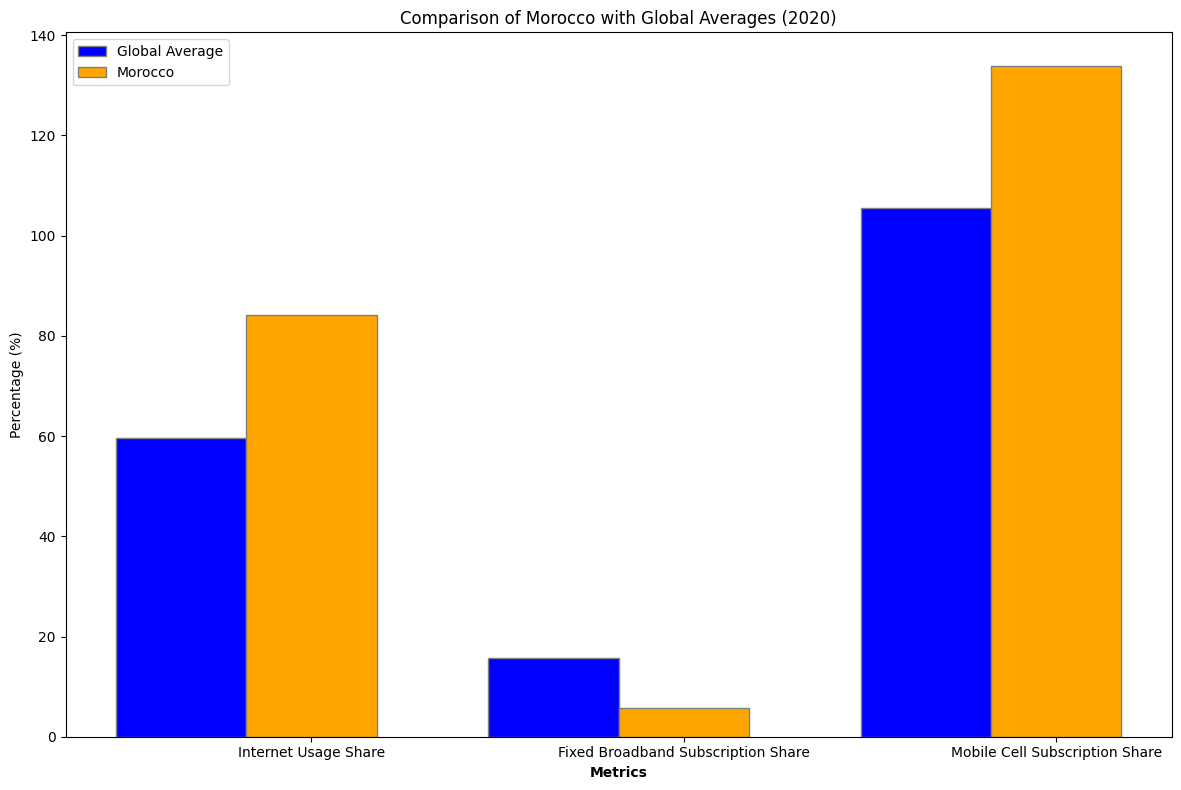

In [17]:
import matplotlib.pyplot as plt

# Data for the comparison with global averages
categories = list(global_averages.keys())
morocco_2020_values = list(morocco_values.values())
global_2020_values = list(global_averages.values())

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Bar positions
bar_width = 0.35
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.bar(r1, global_2020_values, width=bar_width, label='Global Average', color='blue', edgecolor='grey')
plt.bar(r2, morocco_2020_values, width=bar_width, label='Morocco', color='orange', edgecolor='grey')

# Formatting the plot
plt.title('Comparison of Morocco with Global Averages (2020)')
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.ylabel('Percentage (%)')
plt.legend()

plt.tight_layout()

plt.show()

Comparing Morocco's internet and technology adoption rates with global averages for 2020:

**Internet Usage Share:**

- Global Average: 59.58%
- Morocco: 84.12%

Morocco's internet usage share is significantly higher than the global average, indicating a relatively high level of internet adoption.

**Fixed Broadband Subscription Share:**

- Global Average: 15.81%
- Morocco: 5.70%

Morocco's fixed broadband subscription share is below the global average. 

**Mobile Cell Subscription Share:**

- Global Average: 105.48%
- Morocco: 133.89%

Both the global average and Morocco's values exceed 100%, indicating that many individuals have multiple mobile subscriptions. However, Morocco's value is notably higher than the global average, highlighting the country's strong preference for mobile connectivity.

**Next, let's calculate the potential market size for internet services in Morocco by identifying the remaining population without internet access. We'll estimate the number of individuals without internet access in 2020 and then multiply it by an average spending power value (if available) to estimate the market size. However, we'd need external data for the average spending power. For now, we'll calculate the potential number of individuals without access.**

In [13]:
# Calculate the potential number of individuals in Morocco without internet access in 2020
total_population_2020 = morocco_data_2020['users'].values[0] / (morocco_data_2020['share'].values[0] / 100)
individuals_without_access = total_population_2020 - morocco_data_2020['users'].values[0]

individuals_without_access

5826044.331471711

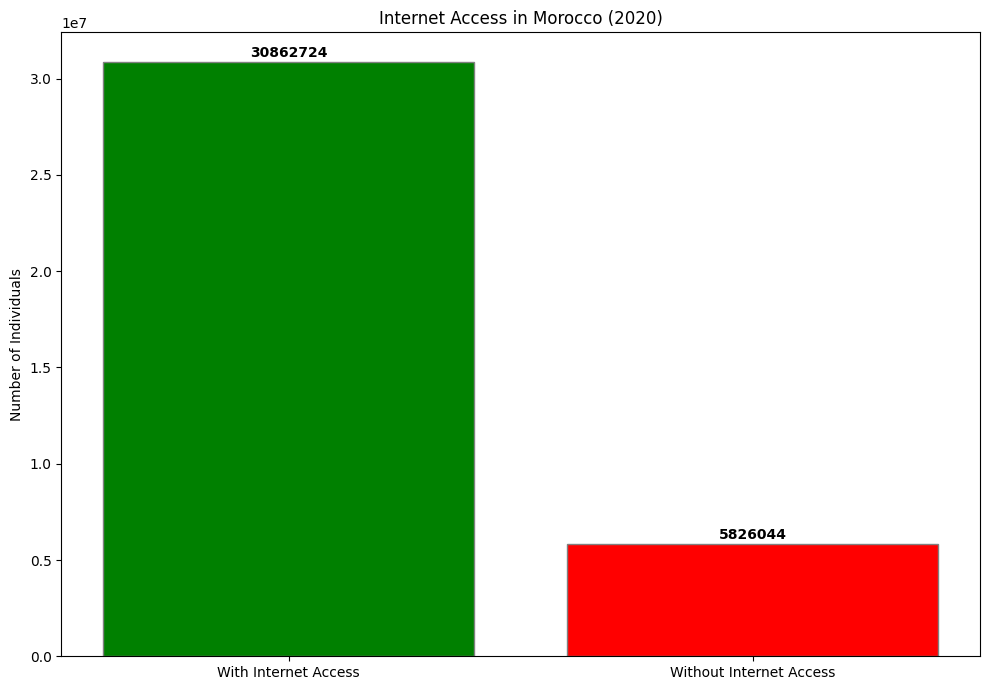

In [18]:
# Data for potential market size visualization
categories = ['With Internet Access', 'Without Internet Access']
population_counts = [total_population_2020 - individuals_without_access, individuals_without_access]

# Set up the figure and axes
plt.figure(figsize=(10, 7))

# Plotting the bars
colors = ['green', 'red']
plt.bar(categories, population_counts, color=colors, edgecolor='grey')

# Formatting the plot
plt.title('Internet Access in Morocco (2020)')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)

# Display the number on top of each bar
for i, v in enumerate(population_counts):
    plt.text(i, v + 100000, str(int(v)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

plt.show()

In 2020, approximately **5.83 million individuals** in Morocco did not have access to the internet. This represents a potential market segment that global internet providers can target, especially given the country's evident digital growth trends.

**Considering this potential market size:**

1. Infrastructure Development: Providers can invest in expanding the infrastructure in areas with low internet penetration, especially rural regions.

2. Affordable Packages: Offering affordable internet packages can attract new users, especially in areas with economic constraints.

3. Collaboration with Local Providers: Forming partnerships with local internet providers could accelerate market penetration and offer mutual benefits.

To further refine the analysis, it would be beneficial to understand the geographical distribution of these unconnected individuals, their demographic profiles, and potential barriers to adoption. Additionally, understanding Morocco's economic landscape, average spending power, and regulatory environment would provide a comprehensive view for strategic decisions.

[Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)